# Exercise 1

Authors:
- Tuoxing Liu
- Sima Esmaeili
- Shruti Ghargi


## 1. Exploring the Data

<div style="color: green; font-weight:
bold">Importing all libraries at the beginning of the code is a common convention that helps to improve the readability, performance, and maintenance of the code.</div>

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


<div style="color: green; font-weight:
bold">Did not answer to the question "what is the size of these images?" Did not use shape attribute.</div>

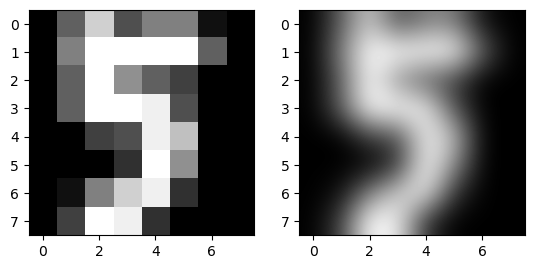

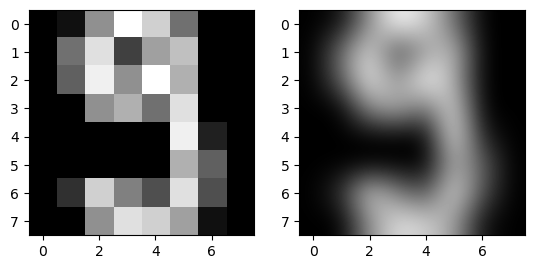

In [2]:
import numpy as numpy
import matplotlib.pyplot as plt

img = digits.images[33]


def print_img(img):
    assert 2 == len(img.shape)
    plt.figure()
    plt.gray()
    plt.subplot(1, 2, 1)
    plt.imshow(img, interpolation="nearest")  # bicubic, nearest
    plt.subplot(1, 2, 2)
    plt.imshow(img,interpolation="bicubic")
    plt.show()


print_img(img)


def print_data(data):
    data_temp = data.reshape(8, 8)
    print_img(data_temp)


print_data(digits.data[39])

<div style="color: green; font-weight:
bold">Should have labelled nearest and bicubic representations. The first image is looking more like a 5 than 3</div>

In [3]:
from sklearn import model_selection
import numpy as np

filter_mask = np.logical_or(target == 3, target == 9)

X_all = data[filter_mask]
y_all = target[filter_mask]

y_all[y_all == 3] = -1
y_all[y_all == 9] = 1
X_train, X_test, y_train, y_test =\
    model_selection.train_test_split(
        X_all, y_all, test_size=0.4, random_state=0)

<div style="color: green; font-weight:
bold">We did not scale our data which may lead the machine learning model to learn the relationships between the features and the target variables in a way that is biased towards the larger-scale features and ignoring the smaller-scale features.</div>

## 2. Hand-crafted classifier

### 2.1 Feature construction

In [4]:
from sklearn.preprocessing import MinMaxScaler


def features2d(datas):
    features = []
    for data in datas:
        mask = data > 12
        temp = [data[18]+data[26]+data[34]+data[42],
                data[11]+data[19]-data[35]-data[43]]
        features.append(temp)

    # normalize
    features_norm = MinMaxScaler().fit_transform(features)

    return features_norm

X_train_2d = features2d(X_train)
X_test_2d = features2d(X_test)

<div style="color: green; font-weight:
bold">The variable mask is not necessary as it is not used in following code.
Feature indices used in the features2d function are hard-coded which becomes problematic if we want to use different feature combinations.Instead they can be passed as parameters to the function.</div>

### 2.2 Scatterplot

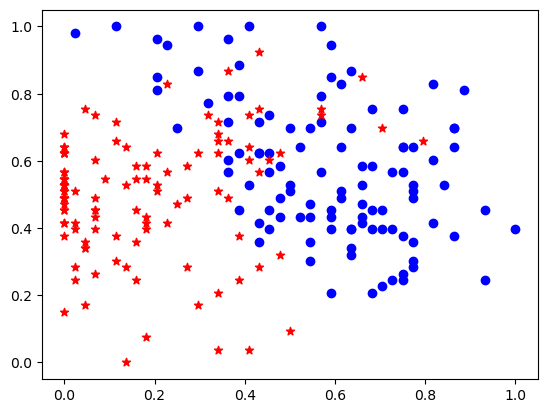

In [5]:
def draw_feature(features, label):
    for feature, y in zip(features, label):
        if y == 3 or y == -1:
            marker = "*"
            color = "red"
        elif y == 9 or y == 1:
            marker = "o"
            color = "blue"
        plt.scatter(feature[0], feature[1], marker=marker, color=color)
        # plt.show()


draw_feature(X_train_2d, y_train)

<div style="color: green; font-weight:
bold">Could have plotted test feature also and named what the red and blue dots symbolise. </div>

### 2.3 Decision rule


In [6]:
def nearest_mean(training_features, training_labels, test_festures):
    t_features = np.array(training_features)
    t_labels = np.array(training_labels)

    f_negetive = t_features[t_labels == -1].mean(axis=0)
    f_positive = t_features[t_labels == 1].mean(axis=0)

    labels = []
    for f in test_festures:
        if abs(f-f_negetive).sum() > abs(f-f_positive).sum():
            labels.append(1)
        else:
            labels.append(-1)

    return np.array(labels)


def print_errors_nearest(X_train, y_train, X_test, y_test):
    train_labels = nearest_mean(X_train, y_train, X_train)
    test_labels = nearest_mean(X_train, y_train, X_test)

    training_error = abs(train_labels - y_train).sum()/(2*len(y_train))
    test_error = abs(test_labels - y_test).sum()/(2*len(y_test))
    print(f"training error: {training_error}")
    print(f"test error: {test_error}")


print_errors_nearest(X_train_2d, y_train, X_test_2d, y_test)

training error: 0.1336405529953917
test error: 0.11643835616438356


<div style="color: green; font-weight:
bold">In the print_errors_nearest function, the nearest_mean function is called twice with X_train and X_test as the third argument, which means that the mean vectors are computed twice. This computation can be avoided by computing the mean vectors once and passing them to the nearest_mean function. </div>

cross validation for nearest mean (64d)

In [7]:
from sklearn.model_selection import KFold

def cross_validation_nearest(X,y,n_splits=10):
    # create a 5-fold cross-validation iterator
    kf = KFold(n_splits=10, shuffle=True, random_state=42)


    test_errors=[]
    # loop over the folds and train/test the model on each fold
    for train_index, test_index in kf.split(X):
        # get the training and test data for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        

        # evaluate the model on the test data for this fold
        test_labels = nearest_mean(X_train, y_train, X_test)
        test_error = abs(test_labels - y_test).sum()/(2*len(y_test))
        test_errors.append(test_error)

    total_error = np.array(test_errors).mean()
    print(f"cross validation error: {total_error}")
    return total_error


cross_validation_nearest(X_all,y_all,n_splits=10)

cross validation error: 0.038513513513513516


0.038513513513513516

<div style="color: green; font-weight:
bold">Could optimize the feature reduction code to use the numpy function argsort() instead of sort() to obtain the indices that would sort the array.</div>

cross validation for nearest mean (2d)

In [8]:
cross_validation_nearest(features2d(X_all),y_all,n_splits=10)

cross validation error: 0.1322072072072072


0.1322072072072072

### 2.4 Visualize the decision regions

training error: 0.1336405529953917
test error: 0.11643835616438356


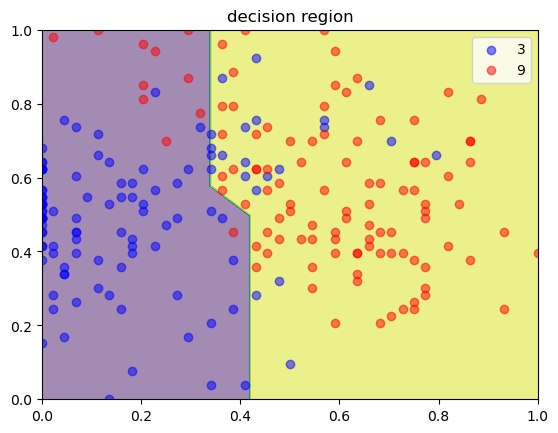

In [9]:
def visualize_nearest(X_train_2d,y_train):
    xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
    grid_features = np.c_[xx.ravel(), yy.ravel()]
    
    grid_predicted_labels  = nearest_mean(X_train_2d, y_train, grid_features).reshape(xx.shape)
    plt.contourf(xx, yy, np.array(grid_predicted_labels), cmap='viridis', alpha=0.5)

    plt.scatter(X_train_2d[y_train == -1,0],X_train_2d[y_train == -1,1], label='3', c='b', alpha=0.5)
    plt.scatter(X_train_2d[y_train == 1,0],X_train_2d[y_train == 1,1], label='9', c='r', alpha=0.5)
    plt.legend()
    plt.title("decision region")


visualize_nearest(X_train_2d,y_train)
print_errors_nearest(X_train_2d,y_train,X_test_2d,y_test)

## 3. LDA

### 3.1 Implement LDA training

In [10]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


def fit_lda(X, y, reg=1e-6):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)

    # Check if any classes have zero samples
    empty_classes = []
    for c in classes:
        if np.sum(y == c) == 0:
            empty_classes.append(c)
    
    # Remove empty classes from the dataset
    X = np.delete(X, np.where(np.isin(y, empty_classes)), axis=0)
    y = np.delete(y, np.where(np.isin(y, empty_classes)))

    mu = np.zeros((n_features, n_classes))
    covmat = np.zeros((n_features, n_features))
    p = np.zeros(n_classes)

    for i, c in enumerate(classes):
        Xc = X[y == c, :]
        n_samples_c = Xc.shape[0]
        mu[:, i] = np.mean(Xc, axis=0)
        covmat += (1 / n_samples_c) * np.dot((Xc - mu[:, i]).T, (Xc - mu[:, i]))
        p[i] = n_samples_c / X.shape[0]

    covmat += reg * np.identity(n_features)
   
    return mu, covmat, p

In [11]:
# Fit LDA model
mu, covmat, p = fit_lda(X_train_2d, y_train)

# Print the results
print('mu:', mu)
print('covmat:', covmat)
print('p:', p)

mu: [[0.17977068 0.58211835]
 [0.49736529 0.57707369]]
covmat: [[ 0.07081433 -0.0131881 ]
 [-0.0131881   0.07666894]]
p: [0.51152074 0.48847926]


### 3.2 Implement LDA prediction



In [12]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split



def predict_lda(mu, covmat, p, test_features):
    n_test = test_features.shape[0]
    predicted_labels = np.zeros(n_test, dtype=np.int8)

    for i in range(n_test):
        x = test_features[i, :]
        g_3 = -0.5 * (x.reshape(-1, 1) - mu[:, 0].reshape(-1, 1)).T @ np.linalg.inv(covmat) @ (x.reshape(-1, 1) - mu[:, 0].reshape(-1, 1)) + np.log(p[0])
        g_9 = -0.5 * (x.reshape(-1, 1) - mu[:, 1].reshape(-1, 1)).T @ np.linalg.inv(covmat) @ (x.reshape(-1, 1) - mu[:, 1].reshape(-1, 1)) + np.log(p[1])
        predicted_labels[i] = -1 if g_3 > g_9 else 1

    return predicted_labels


# Fit LDA model
mu, covmat, p = fit_lda(X_train_2d, y_train)

# Make predictions on test set
test_pred = predict_lda(mu, covmat, p, X_test_2d)
print(test_pred)


[-1  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1
 -1 -1 -1  1  1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1
  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1  1  1
  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1
  1  1]


### 3.3 Visualization

training error: 0.1336405529953917
test error: 0.10273972602739725


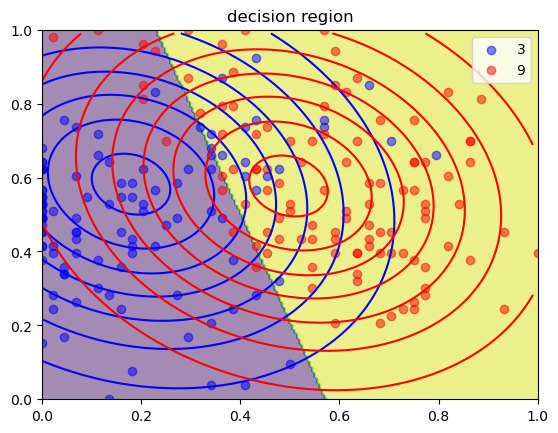

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def draw_contour(mu,cov):
    # Define mean and covariance
    # mu = np.array([0, 0])
    # cov = np.array([[1, 0.5], [0.5, 1]])

    # Generate grid points
    x, y = np.mgrid[0:1:.01, 0:1:.01]
    pos = np.dstack((x, y))

    # Create Gaussian distribution
    rv0 = multivariate_normal(mu[0], cov)
    rv1 = multivariate_normal(mu[1], cov)

    # Get probability density function
    z0 = rv0.pdf(pos)
    z1 = rv1.pdf(pos)

    plt.contour(x, y, z0, colors='b')
    plt.contour(x, y, z1, colors='r')


def visualize_lda(mu, covmat, p,X_train_2d,y_train):
    xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
    grid_features = np.c_[xx.ravel(), yy.ravel()]

    grid_predicted_labels  = predict_lda(mu, covmat, p, grid_features).reshape(xx.shape)
    plt.contourf(xx, yy, np.array(grid_predicted_labels), cmap='viridis', alpha=0.5)

    plt.scatter(X_train_2d[y_train == -1,0],X_train_2d[y_train == -1,1], label='3', c='b', alpha=0.5)
    plt.scatter(X_train_2d[y_train == 1,0],X_train_2d[y_train == 1,1], label='9', c='r', alpha=0.5)
    
    draw_contour(mu,covmat)
    
    plt.legend()
    plt.title("decision region")

def print_errors_lda(mu, covmat, p, X_train,y_train,X_test,y_test):
    train_labels = predict_lda(mu, covmat, p,X_train)
    test_labels = predict_lda(mu, covmat, p,X_test)

    training_error = abs(train_labels - y_train).sum()/(2*len(y_train))
    test_error = abs(test_labels - y_test).sum()/(2*len(y_test))
    print(f"training error: {training_error}")
    print(f"test error: {test_error}")


mu, covmat, p = fit_lda(X_train_2d,y_train)
visualize_lda(mu, covmat, p,X_train_2d,y_train)
print_errors_lda(mu, covmat, p, X_train_2d,y_train,X_test_2d,y_test)

### 3.4 Quantitative performance evaluation

64d LDA

In [14]:
mu, covmat, p = fit_lda(X_train, y_train)
test_pred = predict_lda(mu, covmat, p, X_test)
print_errors_lda(mu, covmat, p, X_train,y_train,X_test,y_test)

training error: 0.004608294930875576
test error: 0.0136986301369863


cross validation for custom LDA

In [15]:
from sklearn.model_selection import KFold

def cross_validation_lda(X,y,n_splits=10):
    # create a 5-fold cross-validation iterator
    kf = KFold(n_splits=10, shuffle=True, random_state=42)


    test_errors=[]
    # loop over the folds and train/test the model on each fold
    for train_index, test_index in kf.split(X):
        # get the training and test data for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # train the model on the training data for this fold
        mu, covmat, p =fit_lda(X_train,y_train)

        # evaluate the model on the test data for this fold
        test_labels = predict_lda(mu, covmat, p, X_test)
        test_error = abs(test_labels - y_test).sum()/(2*len(y_test))
        test_errors.append(test_error)

    total_error = np.array(test_errors).mean()
    print(f"cross validation error: {total_error}")
    return total_error


cross validation for LDA (64d)

In [16]:
cross_validation_lda(X_all,y_all,n_splits=10)

cross validation error: 0.011036036036036036


0.011036036036036036

cross validation for LDA (2d)

In [17]:
cross_validation_lda(features2d(X_all),y_all,n_splits=10)

cross validation error: 0.12364864864864866


0.12364864864864866

cross validation for offical LDA

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_sklearn = LinearDiscriminantAnalysis()
scores_sklearn = cross_val_score(lda_sklearn, X_all, y_all, cv=10)

print(f"cross validation error (scikit-learn): {1-np.mean(scores_sklearn)}")

cross validation error (scikit-learn): 0.02207207207207218


Our custom version is slightly better thant the offical package.

## 4. SVM

In [19]:
def ReLU(x):
    return np.maximum(0, x)


def loss_svm(beta, b, weight, X, y):
    print((X @ beta + b).shape)
    print((y*(X @ beta + b)).shape)
    return 0.5*beta.T@beta + weight/len(y) * np.sum(ReLU(1-y*(X @ beta + b)), axis=0)


def loss_partial_beta(beta, b, weight, X, y):
    wrong_filter = y*(X@beta+b) < 1
    X_wrong = X[wrong_filter]
    y_wrong = y[wrong_filter].reshape(-1, 1)
    return beta + weight/len(y) * np.sum(-y_wrong*X_wrong, axis=0)


def loss_partial_b(beta, b, weight, X, y):
    wrong_filter = y*(X@beta+b) < 1
    y_wrong = y[wrong_filter].reshape(-1, 1)

    return weight/len(y) * np.sum(-y_wrong)


def fit_svm(training_features, training_labels, T=100, weight=0.2, learning_rate=0.8):
    t_features = np.array(training_features)
    t_labels = np.array(training_labels)

    beta = np.random.normal(0, 1, t_features.shape[1])
    b = 0

    training_errors = []
    for i in range(T):
        if i % 5 == 0:
            learning_rate *= 0.5
        beta = beta - learning_rate * \
            loss_partial_beta(beta, b, weight, t_features, t_labels)
        b = b - learning_rate * \
            loss_partial_b(beta, b, weight, t_features, t_labels)

        train_labels = predict_svm(beta, b, t_features)
        training_error = abs(train_labels - t_labels).sum()/(2*len(t_labels))
        training_errors.append(training_error)

    return beta, b, training_errors


def predict_svm(beta, b, test_features):
    return np.sign(test_features @ beta + b)

def print_errors_svm(beta,b, X_train,y_train,X_test,y_test):
    train_labels = predict_svm(beta,b,X_train)
    test_labels = predict_svm(beta,b,X_test)

    training_error = abs(train_labels - y_train).sum()/(2*len(y_train))
    test_error = abs(test_labels - y_test).sum()/(2*len(y_test))
    print(f"training error: {training_error}")
    print(f"test error: {test_error}")

### SVM on 2d features

[0.11687761 0.03496981] -0.09622114541893181
training error: 0.3271889400921659
test error: 0.3287671232876712


Text(0, 0.5, 'learning error')

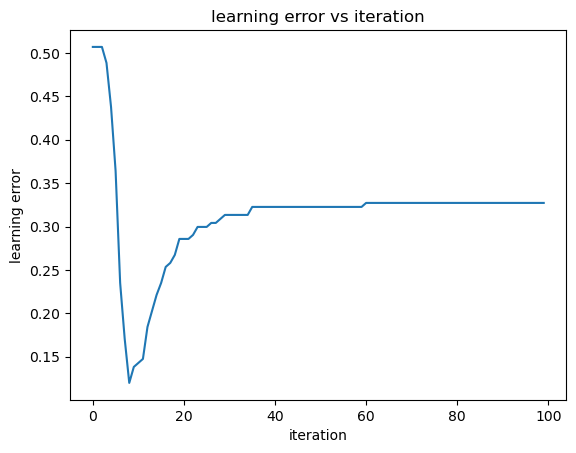

In [20]:
beta,b,errors = fit_svm(features2d(X_train),y_train,weight=0.6)
print(beta,b)

print_errors_svm(beta,b, X_train_2d,y_train,X_test_2d,y_test)

plt.plot(range(len(errors)),errors)
plt.title("learning error vs iteration")
plt.xlabel("iteration")
plt.ylabel("learning error")

### SVM on 64d features

training error: 0.009216589861751152
test error: 0.00684931506849315


Text(0, 0.5, 'learning error')

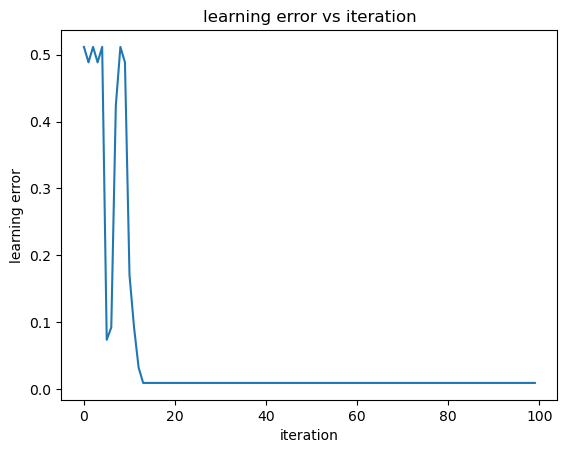

In [21]:
beta,b,errors = fit_svm(X_train,y_train,weight=0.6)
# print(beta,b)



print_errors_svm(beta,b, X_train,y_train,X_test,y_test)
plt.plot(range(len(errors)),errors)
plt.title("learning error vs iteration")
plt.xlabel("iteration")
plt.ylabel("learning error")



### Cross validation for weight(lambda)

In [22]:
from sklearn.model_selection import KFold

def cross_validation_svm(X,y,weights,n_splits=10):
    # create a 5-fold cross-validation iterator
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    errors=[]
    for weight in weights:
        test_errors=[]
        # loop over the folds and train/test the model on each fold
        for train_index, test_index in kf.split(X):
            # get the training and test data for this fold
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # train the model on the training data for this fold
            beta,b,_=fit_svm(X_train,y_train,weight = weight)

            # evaluate the model on the test data for this fold
            test_labels = predict_svm(beta,b,X_test)
            test_error = abs(test_labels - y_test).sum()/(2*len(y_test))
            test_errors.append(test_error)

        error=np.array(test_errors).mean()
        errors.append(error)
        print(f"weight:{weight}, error:{error}")

    best_weight=weights[np.argmin(errors)]
    best_error = errors[np.argmin(errors)]
    print(f"best weight:{best_weight}, best training error:{best_error}")
    return best_weight,best_error

cross_validation_svm(X_train,y_train,np.linspace(0,2,100))

weight:0.0, error:0.5497835497835497
weight:0.020202020202020204, error:0.01883116883116883
weight:0.04040404040404041, error:0.013852813852813853
weight:0.06060606060606061, error:0.009307359307359308
weight:0.08080808080808081, error:0.018614718614718615
weight:0.10101010101010102, error:0.018398268398268396
weight:0.12121212121212122, error:0.013852813852813853
weight:0.14141414141414144, error:0.022943722943722943
weight:0.16161616161616163, error:0.013852813852813853
weight:0.18181818181818182, error:0.018398268398268396
weight:0.20202020202020204, error:0.013852813852813853
weight:0.22222222222222224, error:0.018398268398268396
weight:0.24242424242424243, error:0.013852813852813853
weight:0.26262626262626265, error:0.018398268398268396
weight:0.2828282828282829, error:0.018398268398268396
weight:0.30303030303030304, error:0.013852813852813853
weight:0.32323232323232326, error:0.013852813852813853
weight:0.3434343434343435, error:0.018398268398268396
weight:0.36363636363636365, er

(0.06060606060606061, 0.009307359307359308)

In [ ]:
cross_validation_svm(features2d(X_train),y_train,np.linspace(0,2,100))

weight:0.0, error:0.48852813852813864
weight:0.020202020202020204, error:0.39004329004329
weight:0.04040404040404041, error:0.5106060606060605
weight:0.06060606060606061, error:0.4034632034632034
weight:0.08080808080808081, error:0.3155844155844155
weight:0.10101010101010102, error:0.44632034632034634
weight:0.12121212121212122, error:0.4707792207792208
weight:0.14141414141414144, error:0.39480519480519477
weight:0.16161616161616163, error:0.3911255411255411
weight:0.18181818181818182, error:0.3755411255411255
weight:0.20202020202020204, error:0.39069264069264065
weight:0.22222222222222224, error:0.36363636363636365
weight:0.24242424242424243, error:0.2935064935064935
weight:0.26262626262626265, error:0.3677489177489177
weight:0.2828282828282829, error:0.3993506493506493
weight:0.30303030303030304, error:0.42662337662337657
weight:0.32323232323232326, error:0.39069264069264065
weight:0.3434343434343435, error:0.395021645021645
weight:0.36363636363636365, error:0.40887445887445883
weigh

For 64 dim features: 
- best weight: 0.06
- best training error:0.009

For 2 dim features: 
- best weight: 0.58
- best training error: 0.33

cross validation for svm (64d)

In [ ]:
cross_validation_svm(X_all,y_all,[0.06])

cross validaion for svm (2d)

In [ ]:
cross_validation_svm(features2d(X_all),y_all,[0.6])

### Visualize the decision boundary

In [ ]:
def visualize_svm(beta,b,X_train_2d,y_train):
    xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
    grid_features = np.c_[xx.ravel(), yy.ravel()]

    grid_predicted_labels = predict_svm(beta,b,grid_features).reshape(xx.shape)
    plt.contourf(xx, yy, np.array(grid_predicted_labels), cmap='viridis', alpha=0.5)

    plt.scatter(X_train_2d[y_train == -1,0],X_train_2d[y_train == -1,1], label='3', c='b', alpha=0.5)
    plt.scatter(X_train_2d[y_train == 1,0],X_train_2d[y_train == 1,1], label='9', c='r', alpha=0.5)
    plt.legend()
    plt.title("decision region")


beta,b,errors = fit_svm(features2d(X_train),y_train,weight=0.6)
visualize_svm(beta,b,X_train_2d,y_train)
print_errors_svm(beta,b, X_train_2d,y_train,X_test_2d,y_test)

### Compare with sklearn.svm

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_2d, y_train)
beta = svm.coef_.reshape(-1)
b = svm.intercept_

visualize_svm(beta,b,X_train_2d,y_train)
print_errors_svm(beta,b, X_train_2d,y_train,X_test_2d,y_test)

The official package has similar performance with our custom one and they have different decision plane.


### How does the prediction quality change relative to LDA and the nearest mean classier

cross validation: (64d)
- nearest mean: 0.0385
- LDA: 0.0110
- SVM: 0.0138

cross validation: (2d)
- nearest mean: 0.1322
- LDA: 0.1236
- SVM: 0.3988

In 64d, the performance of LDA and SVM is similar, and they are significantly better than nearest mean.
In 2d, the performance of SVM and nearest mean is similar, and they are significantly better than SVM.